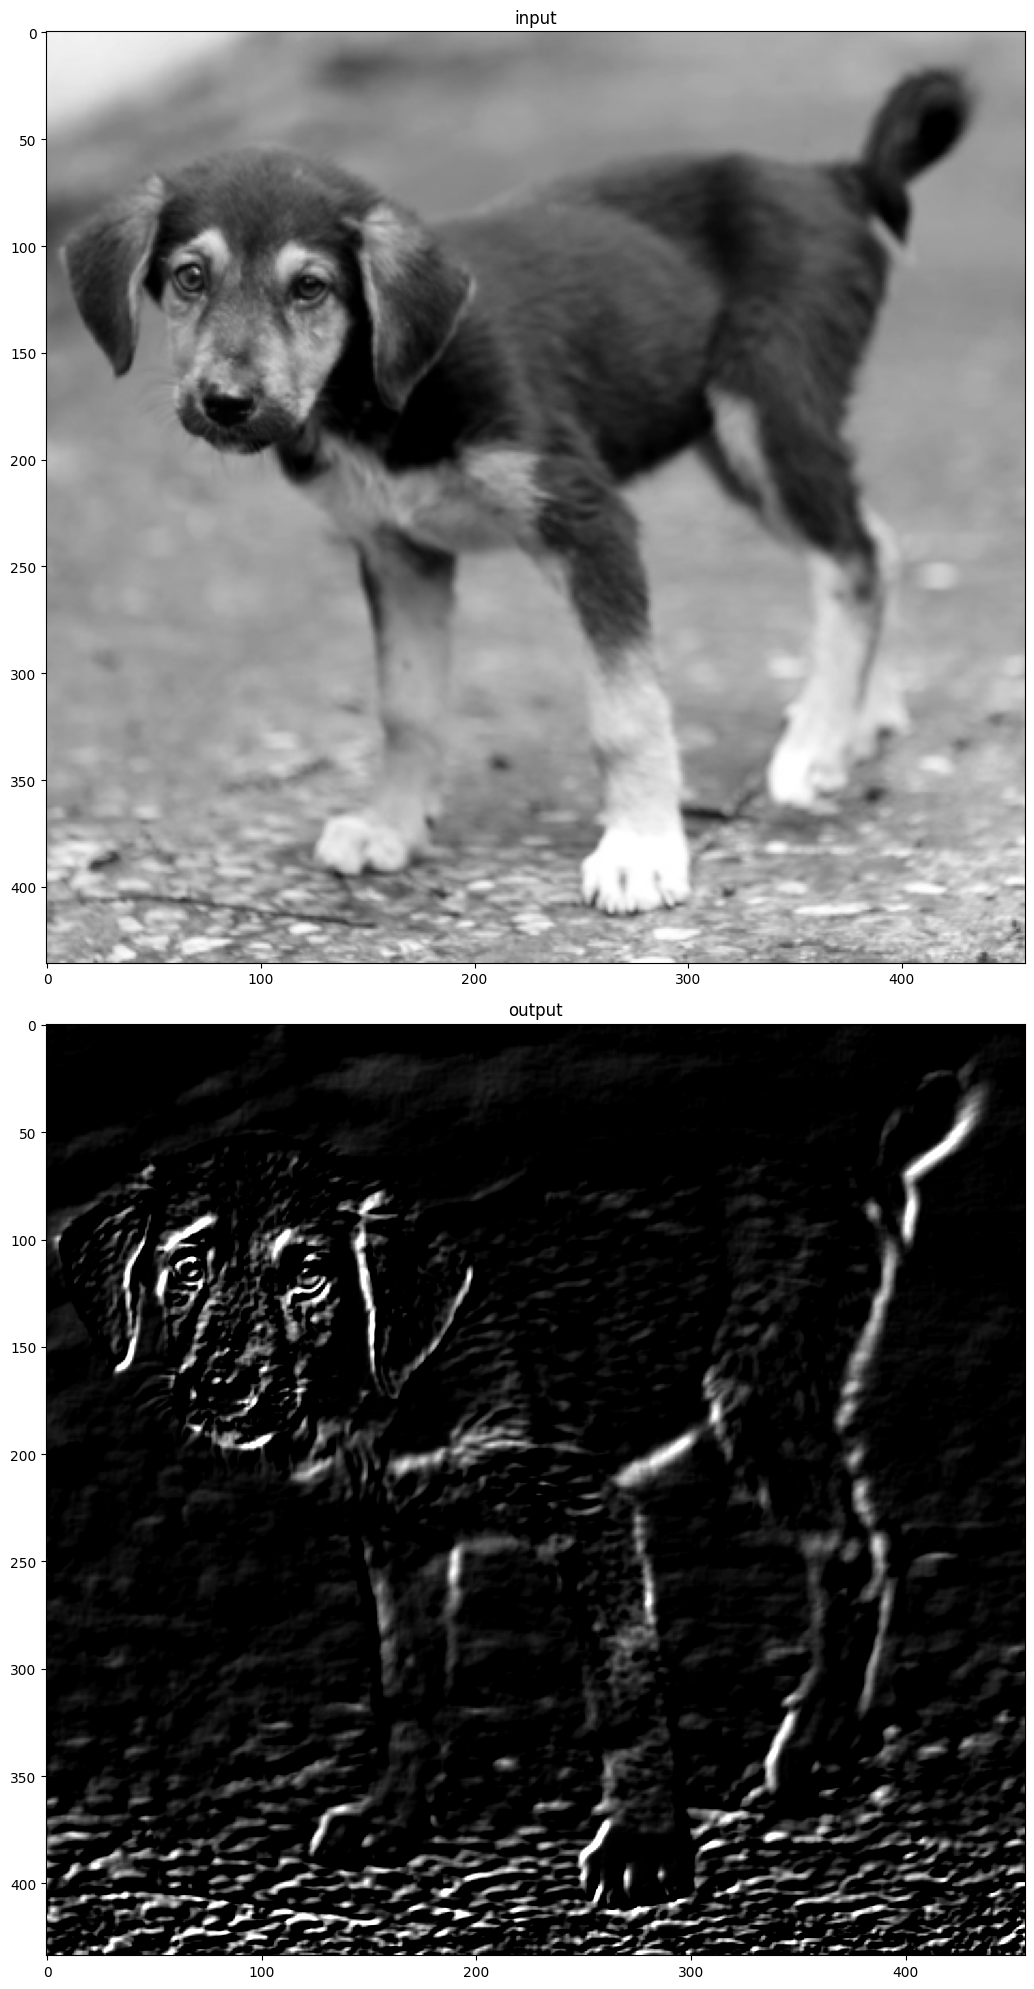

In [3]:
#filtering funtion
import numpy as np 
import cv2
import matplotlib.pyplot as plt
def matrix_sum(mat_1,mat_2):
    sum = 0
    for i in range(mat_1.shape[0]):
        for j in range(mat_1.shape[1]):
            sum = sum + mat_1[i][j] * mat_2[i][j]
    return sum
def filter_operation(image,kernel):
    #must use a odd size of filter
    kernel_center = (kernel.shape[0]-1)//2
    kernel_dimension = kernel.shape[0]
    image_height = image.shape[0]
    image_width = image.shape[1]
    out_image_height = int(image_height-2*kernel_center)
    out_image_width = int(image_width-2*kernel_center)
    out_image = np.zeros((out_image_height,out_image_width))
    for row in range(out_image_height):
        for column in range(out_image_width):
            mat = image[row:row+kernel_dimension,column:column+kernel_dimension]
            #print(mat)
            out_image[row,column] = matrix_sum(mat,kernel)
    return out_image
blur_kernel = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])/9
line_detection_1 = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])
line_detection_2 = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])
image = cv2.imread('d10.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
filtered_image1 = filter_operation(image,line_detection_1)
filtered_image2 = filter_operation(image,line_detection_2)
filtered_image = filtered_image1+filtered_image2

# filtered_image2 = padd_image(filtered_image1,1)
# filtered_image2 = image+filtered_image2
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.title('input')
plt.imshow(image,cmap='gray')
plt.subplot(2,1,2)
plt.title('output')
plt.imshow(filtered_image, cmap="gray",vmin=0,vmax=255)
plt.tight_layout()
plt.show()
